Importing the required libraries

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA 
import warnings
warnings.filterwarnings("ignore")
     

In [50]:
data= pd.read_csv(r"C:\Users\vinay\OneDrive\Desktop\Christ\SEM2\MACHINE LEARNING\DATASETS\german_credit_data.csv")

### 1. Data Display

In [51]:
data.head() # for first 5 records

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [52]:
data.tail() #for last 5 records

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [53]:
data.columns #to know about the feaures in the dataset

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

#### 1.1 Removing unnecessary colum

In [54]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True) #removing unwanted column

In [55]:
data.head(2) #verifying our dropped column is removed from dataframe

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV


#### 1.2 To display basic information about dataset

In [56]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [57]:
data.shape #provides the size of dataframe with number of rows and columns

(1000, 9)

#### 1.3 Counting null and duplicate values

In [58]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [59]:
print("Percentage of missing data column wise:") #to print the missing value report
print('-'*40)
for i in data.columns:
    print(f"{i} : {((data[i].isnull().sum())/data.shape[0])*100} %")


Percentage of missing data column wise:
----------------------------------------
Age : 0.0 %
Sex : 0.0 %
Job : 0.0 %
Housing : 0.0 %
Saving accounts : 18.3 %
Checking account : 39.4 %
Credit amount : 0.0 %
Duration : 0.0 %
Purpose : 0.0 %


In [60]:
data.duplicated().sum() # to check if duplicate rows are there or not

0

#### 1.4 Checking the 5 point statistical summary

In [61]:
data.describe() #gives statistical summary

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## 2. Handling null values

**Interpretation:** The above plot shows that most of the people have little fund in their Savings Account.

**Interpretation:** The above plot shows that equal number of people have little and moderate funds in their Checking Account.

In [62]:
from scipy.stats import skew # to import stats function

In [63]:
data.skew()

Age              1.020739
Job             -0.374295
Credit amount    1.949628
Duration         1.094184
dtype: float64

**Interpretation:** The above are the values of skewness for different numerical columns which shows except job feature rest of them are highly skewed.

### 2.1 Filling the values

In [64]:
data['Saving accounts'].fillna('little',inplace=True)

**Reason:** Since savings account has more people with little funds hence we replaced null values with little class value

In [65]:
data['Saving accounts'].isnull().sum()

0

##### Savings account values filling
**Reason:** Since savings account has equal number of people with moderate and little funds we will equally replace these values

In [66]:
ca = data['Checking account']
ca1 = ca[:501]
ca2 = ca[501:]

In [67]:
ca1.isnull().sum()

197

In [68]:
ca2.isnull().sum()

197

In [69]:
ca1.fillna('little',inplace=True)
ca2.fillna('moderate',inplace=True)
ca_new = pd.concat([ca1,ca2],axis=0)

In [70]:
ca_new.isnull().sum()

0

In [71]:
data['Checking Account']=ca_new

In [72]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Checking Account
0,67,male,2,own,little,little,1169,6,radio/TV,little
1,22,female,2,own,little,moderate,5951,48,radio/TV,moderate
2,49,male,1,own,little,little,2096,12,education,little
3,45,male,2,free,little,little,7882,42,furniture/equipment,little
4,53,male,2,free,little,little,4870,24,car,little
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,moderate,1736,12,furniture/equipment,moderate
996,40,male,3,own,little,little,3857,30,car,little
997,38,male,2,own,little,moderate,804,12,radio/TV,moderate
998,23,male,2,free,little,little,1845,45,radio/TV,little


In [73]:
data.drop(columns=['Checking account','Checking account'],inplace=True)

In [74]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Credit amount       0
Duration            0
Purpose             0
Checking Account    0
dtype: int64

**All missing values have been handled.**

<AxesSubplot: >

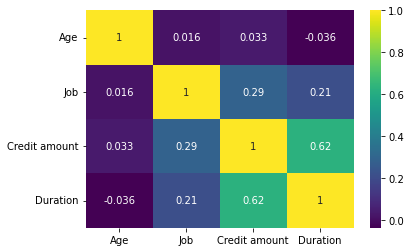

In [75]:
sns.heatmap(data.corr(),annot=True,cmap='viridis') #Correlation plot for numerical columns

**Interpretation:** Above plot shows that duration and credit amount has high positive correlation and age and duration have very little negative correlation.

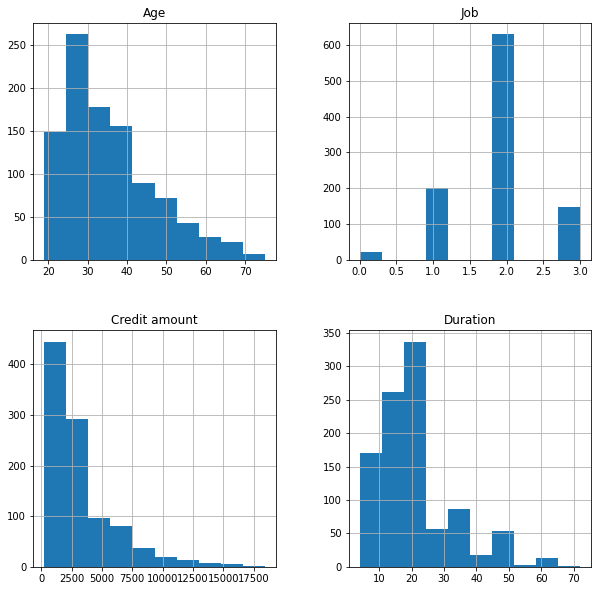

In [76]:
data.hist(figsize=(10,10)) #histogram showing distribution of numerical features
plt.show()

**Interpretation:** Above histogram plots show the skewness we calculated above and verifies it.

<AxesSubplot: xlabel='Sex', ylabel='Credit amount'>

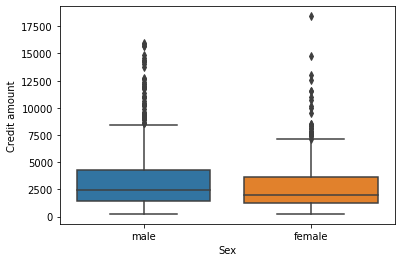

In [77]:
sns.boxplot(x=data['Sex'],y=data['Credit amount']) #boxplot shows 5 point statistical summary in plot

**Interpretation:** Plot above shows that Males and Females are taking almost the same amount of credit from bank.

<AxesSubplot: xlabel='Job', ylabel='Credit amount'>

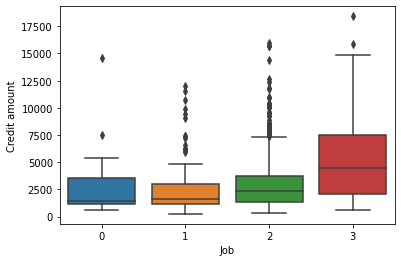

In [78]:
sns.boxplot(x=data['Job'],y=data['Credit amount'])

**Interpretation:** Plot above shows that people with job title 3 i.e. highly skilled take more loan as they can repay it due to high salary.

<AxesSubplot: xlabel='Sex', ylabel='Duration'>

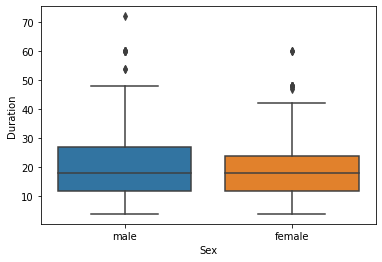

In [79]:
sns.boxplot(x=data['Sex'],y=data['Duration'])

**Interpretation:** Plot above shows that Males and females take loan for almost same duration from bank.

In [80]:
data['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

<AxesSubplot: xlabel='Housing', ylabel='Credit amount'>

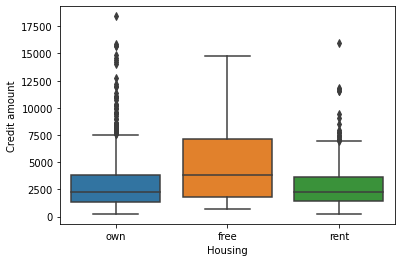

In [82]:
sns.boxplot(x=data['Housing'],y=data['Credit amount'])

**Interpretation:** Plot above shows that people living in free house taking more loan since they might not have house mortgages as compared to other category people so they have more money at disposal.

## 3. Preprocessing

#### 3.1 Encoding the categorical columns

In [83]:
from sklearn.preprocessing import OneHotEncoder
data['Housing']=data['Housing'].astype('category')
data['Housing_n']=data['Housing'].cat.codes

data['Sex']=data['Sex'].astype('category')
data['Sex_n']=data['Sex'].cat.codes

data['Saving accounts']=data['Saving accounts'].astype('category')
data['Savings_Account_n']=data['Saving accounts'].cat.codes

data['Purpose']=data['Purpose'].astype('category')
data['Purpose_n']=data['Purpose'].cat.codes

data['Checking Account']=data['Checking Account'].astype('category')
data['Checking_Account_n']=data['Checking Account'].cat.codes


In [84]:
data

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Checking Account,Housing_n,Sex_n,Savings_Account_n,Purpose_n,Checking_Account_n
0,67,male,2,own,little,1169,6,radio/TV,little,1,1,0,5,0
1,22,female,2,own,little,5951,48,radio/TV,moderate,1,0,0,5,1
2,49,male,1,own,little,2096,12,education,little,1,1,0,3,0
3,45,male,2,free,little,7882,42,furniture/equipment,little,0,1,0,4,0
4,53,male,2,free,little,4870,24,car,little,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,1736,12,furniture/equipment,moderate,1,0,0,4,1
996,40,male,3,own,little,3857,30,car,little,1,1,0,1,0
997,38,male,2,own,little,804,12,radio/TV,moderate,1,1,0,5,1
998,23,male,2,free,little,1845,45,radio/TV,little,0,1,0,5,0


In [85]:
data.drop(columns=['Sex','Housing','Saving accounts','Checking Account','Purpose'],axis=1,inplace=True) #dropping encoded columns

In [86]:
data #new encoded dataframe

,Age,Job,Credit amount,Duration,Housing_n,Sex_n,Savings_Account_n,Purpose_n,Checking_Account_n
0,67,2,1169,6,1,1,0,5,0
1,22,2,5951,48,1,0,0,5,1
2,49,1,2096,12,1,1,0,3,0
3,45,2,7882,42,0,1,0,4,0
4,53,2,4870,24,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,0,4,1
996,40,3,3857,30,1,1,0,1,0
997,38,2,804,12,1,1,0,5,1
998,23,2,1845,45,0,1,0,5,0


In [87]:
df_features = data.drop(['Credit amount'], axis=1) #creating new dataframes with features and target/label variable
df_label = data['Credit amount']

#### 3.2 Scaling the data

In [88]:
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler()
standardized.fit(df_features)

StandardScaler()

In [89]:
scaled_data = standardized.transform(df_features)
scaled_data

array([[ 2.76645648,  0.14694918, -1.23647786, ..., -0.4634091 ,
         1.07326286, -0.97649891],
       [-1.19140394,  0.14694918,  2.24819436, ..., -0.4634091 ,
         1.07326286,  0.67299249],
       [ 1.18331231, -1.38377145, -0.73866754, ..., -0.4634091 ,
         0.06170503, -0.97649891],
       ...,
       [ 0.21583532,  0.14694918, -0.73866754, ..., -0.4634091 ,
         1.07326286,  0.67299249],
       [-1.10345149,  0.14694918,  1.9992892 , ..., -0.4634091 ,
         1.07326286, -0.97649891],
       [-0.75164167,  0.14694918,  1.9992892 , ...,  0.77897455,
        -0.9498528 ,  0.67299249]])

In [90]:
scaled_data.shape

(1000, 8)

### Applying PCA on the scaled data

In [91]:
X = data.iloc[:, 1:].values
y = data['Credit amount'].values

In [92]:
for i in range(0,1000):
    if df_label[i]>0 and df_label[i]<=5000:
        df_label[i] = 1
    elif df_label[i]>5000 and df_label[i]<=10000:
        df_label[i] = 2
    elif df_label[i]>10000 and df_label[i]<=15000:
        df_label[i] = 3
    elif df_label[i]>15000 and df_label[i]<20000:
        df_label[i] = 4


**Credit Class Categories** </br>
Class 1: <5000 Euro </br>
Class 2: >5000 and <=10,000 Euro </br>
Class 3: >10,000 and <=15,000 Euro </br>
Class 4: >15,000 and <20,000 Euro </br>

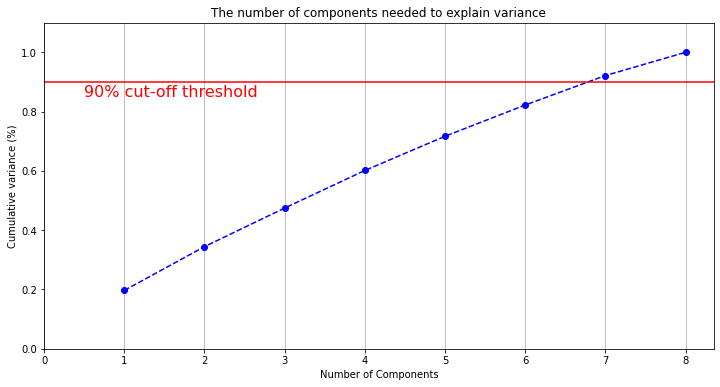

In [98]:
import numpy as np
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 9, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 9, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

**Interpretation:** 6 features explain 90% variation in data

In [99]:
pca.explained_variance_ratio_

array([0.19676937, 0.14770458, 0.13023777, 0.12667016, 0.11540989,
       0.10539807, 0.09934507, 0.07846509])

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
    
x_pca = pca.fit_transform(scaled_data)
x_pca

array([[ 1.00083699,  1.90148799, -1.87057466],
       [-0.43716877, -2.15232066,  0.36142743],
       [ 0.18070777,  1.60615877, -1.3839129 ],
       ...,
       [ 0.14489704,  0.59518162, -0.49836724],
       [ 1.49171107, -1.56499328, -0.97056016],
       [ 0.94738   , -1.20845425,  1.69073059]])

In [101]:
x_pca.shape

(1000, 3)

In [102]:
x_pca

array([[ 1.00083699,  1.90148799, -1.87057466],
       [-0.43716877, -2.15232066,  0.36142743],
       [ 0.18070777,  1.60615877, -1.3839129 ],
       ...,
       [ 0.14489704,  0.59518162, -0.49836724],
       [ 1.49171107, -1.56499328, -0.97056016],
       [ 0.94738   , -1.20845425,  1.69073059]])

#### Projecting three components on 3D Plot

In [103]:
x_pca_df = pd.DataFrame(x_pca)

In [104]:
new_pca_df =pd.concat([x_pca_df,df_label],axis=1)

In [105]:
import plotly.express as px
fig = px.scatter_3d(new_pca_df, x=0, y=1, z=2,color='Credit amount',labels={'0':"Component 1",'1':"Component 2",'2':"Component 3"})
fig.show()

In [112]:
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)

In [113]:
df_pc

,Age,Job,Duration,Housing_n,Sex_n,Savings_Account_n,Purpose_n,Checking_Account_n
0,0.442133,0.314557,0.344417,-0.577426,0.457223,-0.074463,-0.187705,0.060818
1,0.493836,-0.530272,-0.576173,-0.164068,0.153366,0.264374,0.037950,0.145565
2,-0.127929,0.100843,0.191066,0.113264,-0.050449,0.688548,-0.339456,0.576416


Text(114.0, 0.5, 'Principal Components')

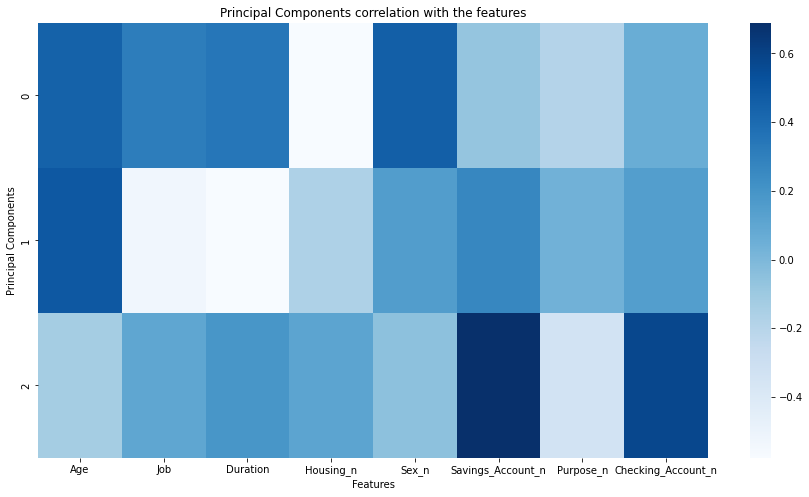

In [114]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap = 'Blues')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')
     

In [115]:
pca = PCA(n_components=6)
    
x_pca = pca.fit_transform(scaled_data)
x_pca

array([[ 1.00083699,  1.90148799, -1.87057466,  0.07190151,  0.97620508,
         0.62558269],
       [-0.43716877, -2.15232066,  0.36142743,  1.48777694, -0.18459834,
         0.63304484],
       [ 0.18070777,  1.60615877, -1.3839129 , -0.7248761 , -0.09054347,
        -0.34107267],
       ...,
       [ 0.14489704,  0.59518162, -0.49836724,  1.2704384 , -0.0541123 ,
        -0.43670135],
       [ 1.49171107, -1.56499328, -0.97056016,  0.75957174,  0.79988813,
        -0.85298356],
       [ 0.94738   , -1.20845425,  1.69073059, -0.31123253, -0.29511188,
        -0.83601008]])

In [116]:
x_pca_df = pd.DataFrame(x_pca)

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca_df, df_label, test_size=0.3, random_state=42)

## 4. Model Building

### Hierachial Clustering

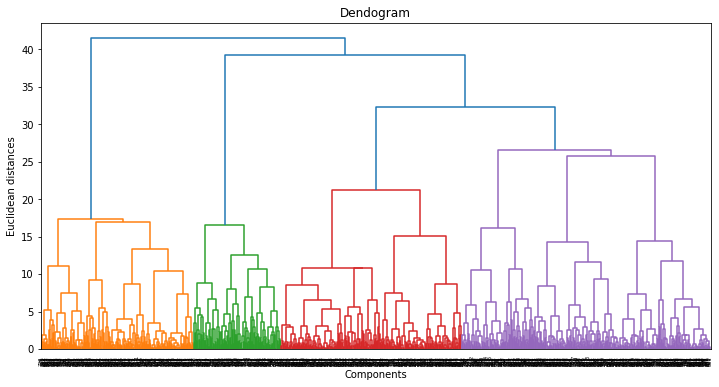

In [118]:
# Import library for hierarchial cluster for ploting dendogram
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x_pca_df,method='ward'))
plt.title('Dendogram')
plt.xlabel('Components')
plt.ylabel('Euclidean distances')
plt.show()

In [119]:
# Import library for Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca_df)
y_hc

array([4, 3, 4, 0, 4, 4, 2, 0, 2, 0, 3, 3, 3, 4, 3, 2, 4, 0, 4, 2, 4, 2,
       0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 3, 1, 0, 1, 1, 1, 2, 2, 1, 3,
       4, 3, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 3, 3, 3, 0, 1, 0, 0, 3, 4,
       3, 2, 0, 3, 3, 1, 4, 3, 0, 4, 1, 1, 0, 1, 3, 2, 3, 4, 4, 3, 3, 0,
       2, 1, 4, 4, 3, 1, 2, 0, 4, 0, 1, 0, 0, 1, 3, 1, 0, 1, 0, 0, 3, 2,
       0, 3, 0, 3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 0, 3, 0, 1, 1, 0, 3, 3, 1,
       1, 4, 3, 3, 2, 2, 1, 3, 2, 3, 1, 1, 3, 0, 3, 4, 1, 2, 4, 1, 1, 2,
       0, 3, 4, 4, 0, 1, 2, 3, 2, 0, 2, 2, 3, 2, 3, 0, 0, 3, 3, 1, 1, 4,
       1, 2, 1, 4, 0, 0, 4, 2, 0, 1, 4, 0, 2, 3, 2, 0, 0, 1, 1, 3, 3, 3,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 3, 4, 0, 4, 3, 0, 1, 1, 4,
       1, 3, 1, 0, 0, 1, 2, 4, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 3, 4,
       0, 3, 2, 0, 4, 0, 1, 3, 2, 3, 3, 2, 1, 1, 1, 4, 2, 4, 1, 4, 0, 4,
       0, 1, 0, 3, 4, 1, 0, 2, 0, 1, 1, 1, 3, 4, 3, 2, 2, 4, 1, 4, 0, 3,
       0, 1, 4, 4, 0, 0, 4, 0, 0, 3, 3, 0, 1, 2, 4,

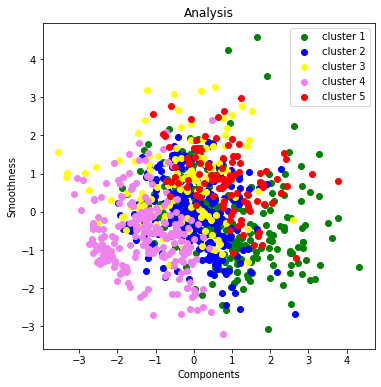

In [120]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(x_pca_df.iloc[y_hc == 0, 0], x_pca_df.iloc[y_hc == 0, 1],c='green', label='cluster 1')
plt.scatter(x_pca_df.iloc[y_hc == 1, 0], x_pca_df.iloc[y_hc == 1, 1],c='blue', label='cluster 2')
plt.scatter(x_pca_df.iloc[y_hc == 2, 0], x_pca_df.iloc[y_hc == 2, 1],c='yellow', label='cluster 3')
plt.scatter(x_pca_df.iloc[y_hc == 3, 0], x_pca_df.iloc[y_hc == 3, 1],c='violet', label='cluster 4')
plt.scatter(x_pca_df.iloc[y_hc == 4, 0], x_pca_df.iloc[y_hc == 4, 1],c='red', label='cluster 5')
plt.legend()
plt.title('Analysis')
plt.xlabel('Components')
plt.ylabel('Smoothness')
ax.set_aspect('equal');

# Inference

In this lab, we have tried to gain the knowledge about data and its variables, further we did some preprocessing to the data in order to bring it into more analyst friendly mode, laterly we implemented various graphs using various libraries in order to get valuable insights. Furthermore, with that we perform dimensionality reduction which can help the banks to predict credit amount for the customers. We implemented and evaluated KMeans clustering to get accuracy in terms of predicting credit amount category. 